# Data Science Coding Challeng Solution for 7Learnings - Candidate: Mehdi Ghorbani

In [1]:
%load_ext bigquery_magics

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 20 years ago. So if today is 1 April 2025 then the weather we want to forecast is for the 2 April 2005. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part.

In [3]:
%%bigquery
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,10,18,48.500000,4,46.000000,4,NaN,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,38640,99999,1929,12,8,48.200001,4,38.500000,4,994.799988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,33790,99999,1929,8,5,56.500000,4,48.500000,4,1010.000000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
3,36010,99999,1929,11,10,49.200001,4,41.500000,4,1008.700012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,39730,99999,1929,11,18,44.500000,4,39.700001,4,1004.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
5,37770,99999,1929,8,30,63.200001,4,55.500000,4,1018.000000,...,NaN,<NA>,0.00,NaN,True,True,True,True,True,True
6,30750,99999,1929,12,12,40.200001,4,38.700001,4,990.799988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
7,33110,99999,1929,12,14,50.299999,4,48.500000,4,1016.000000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,33790,99999,1929,10,25,40.700001,4,37.200001,4,992.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
9,33790,99999,1929,12,9,40.700001,4,38.000000,4,991.599976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [13]:
%%bigquery weather_df
SELECT
    * EXCEPT(year, month, day),
    CONCAT(CAST(year AS STRING), '-', 
          LPAD(CAST(month AS STRING), 2, '0'), '-', 
          LPAD(CAST(day AS STRING), 2, '0')) AS date
FROM `bigquery-public-data.samples.gsod`
WHERE 
    year BETWEEN 2000 AND 2005
    AND station_number BETWEEN 725300 AND 726300

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
from tabulate import tabulate
import pandas as pd

weather_df['date'] = pd.to_datetime(weather_df['date'])

# Check available years
years = weather_df['date'].dt.year.unique().tolist()
print("Available Years in the Dataset:\n")
print(tabulate([[y] for y in sorted(years)], headers=["Year"], tablefmt="fancy_grid"))

print("\n" + "-" * 40 + "\n")

# Check station number range
station_stats = [
    ["Min Station Number", weather_df['station_number'].min()],
    ["Max Station Number", weather_df['station_number'].max()]
]
print("Station Number Range:\n")
print(tabulate(station_stats, headers=["Description", "Value"], tablefmt="fancy_grid"))


Available Years in the Dataset:

╒════════╕
│   Year │
╞════════╡
│   2000 │
├────────┤
│   2001 │
├────────┤
│   2002 │
├────────┤
│   2003 │
├────────┤
│   2004 │
├────────┤
│   2005 │
╘════════╛

----------------------------------------

Station Number Range:

╒════════════════════╤═════════╕
│ Description        │   Value │
╞════════════════════╪═════════╡
│ Min Station Number │  725300 │
├────────────────────┼─────────┤
│ Max Station Number │  726300 │
╘════════════════════╧═════════╛


### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

In [15]:
%%bigquery weather_df
SELECT
    * EXCEPT(year, month, day),
    CONCAT(CAST(year AS STRING), '-', 
          LPAD(CAST(month AS STRING), 2, '0'), '-', 
          LPAD(CAST(day AS STRING), 2, '0')) AS date
FROM `bigquery-public-data.samples.gsod`
WHERE 
    year BETWEEN 2000 AND 2005
    AND station_number BETWEEN 725300 AND 725330

Query is running:   0%|          |

Downloading:   0%|          |

#### The year with the most snow fall

In [19]:
%%bigquery snowfall_by_year
SELECT
    year,
    SUM(snow_depth) AS total_snowfall_inches
FROM `bigquery-public-data.samples.gsod`
WHERE
    year BETWEEN 2000 AND 2005
    AND station_number BETWEEN 725300 AND 725330
    AND snow_depth IS NOT NULL
GROUP BY year
ORDER BY total_snowfall_inches DESC

Query is running:   0%|          |

Downloading:   0%|          |

In [20]:
snowfall_by_year.head()

,year,total_snowfall_inches
0,2000,1084.500006
1,2001,591.300003
2,2005,474.300002
3,2004,389.799999
4,2003,303.700002


Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.

In [22]:
%%bigquery snow_depth_with_changes
WITH with_dates AS (
  SELECT
    *,
    CONCAT(CAST(year AS STRING), '-', 
           LPAD(CAST(month AS STRING), 2, '0'), '-', 
           LPAD(CAST(day AS STRING), 2, '0')) AS date
  FROM `bigquery-public-data.samples.gsod`
  WHERE
    station_number BETWEEN 725300 AND 725330
    AND year BETWEEN 2000 AND 2005
    AND snow_depth IS NOT NULL
),

daily_changes AS (
  SELECT
    *,
    snow_depth - LAG(snow_depth) OVER (
      PARTITION BY station_number 
      ORDER BY date
    ) AS snow_depth_change
  FROM with_dates
)

SELECT * FROM daily_changes
WHERE snow_depth_change IS NOT NULL
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

In [23]:
snow_depth_with_changes.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date,snow_depth_change
0,725320,14842,2000,1,20,13.9,24,7.9,24,1020.099976,...,0.02,3.9,True,True,True,True,True,True,2000-01-20,0.0
1,725320,14842,2000,1,21,5.7,24,-0.8,24,1025.500000,...,0.00,3.9,True,True,True,True,True,True,2000-01-21,0.0
2,725320,14842,2000,1,22,19.9,24,14.4,24,1017.200012,...,0.00,3.1,True,True,True,True,True,True,2000-01-22,-0.8
3,725320,14842,2000,1,23,20.1,24,14.5,24,1018.500000,...,0.00,2.0,True,True,True,True,True,True,2000-01-23,-1.1
4,725320,14842,2000,1,24,6.9,24,-0.5,24,1025.199951,...,0.00,2.0,False,False,False,False,False,False,2000-01-24,0.0


With Max Snow Increase

In [25]:
%%bigquery max_snow_increase
WITH with_dates AS (
  SELECT
    *,
    CONCAT(CAST(year AS STRING), '-', 
           LPAD(CAST(month AS STRING), 2, '0'), '-', 
           LPAD(CAST(day AS STRING), 2, '0')) AS date
  FROM `bigquery-public-data.samples.gsod`
  WHERE
    station_number BETWEEN 725300 AND 725330
    AND year BETWEEN 2000 AND 2005
    AND snow_depth IS NOT NULL
),

daily_changes AS (
  SELECT
    *,
    snow_depth - LAG(snow_depth) OVER (
      PARTITION BY station_number 
      ORDER BY date
    ) AS snow_depth_change
  FROM with_dates
)

SELECT
  station_number,
  date,
  snow_depth,
  snow_depth_change
FROM daily_changes
WHERE snow_depth_change IS NOT NULL
ORDER BY snow_depth_change DESC

Query is running:   0%|          |

Downloading:   0%|          |

In [26]:
print("The maximum snow depth increase:")
max_snow_increase.head()

The maximum snow depth increase:


,station_number,date,snow_depth,snow_depth_change
0,725300,2005-01-22,11.8,9.8
1,725300,2000-12-11,9.1,7.9
2,725300,2002-01-31,9.1,7.9
3,725330,2004-12-23,7.9,6.7
4,725300,2000-02-19,9.1,6.0


Drop NULL Values

In [48]:
%%bigquery cleaned_weather
SELECT 
  station_number,
  year, month, day,
  * EXCEPT(station_number, year, month, day, fog, rain, snow, hail, thunder, tornado),
  IFNULL(mean_temp, 0) AS mean_temp,
  IFNULL(num_mean_temp_samples, 0) AS num_mean_temp_samples,
  IFNULL(mean_dew_point, 0) AS mean_dew_point,
  IFNULL(mean_sealevel_pressure, 0) AS mean_sealevel_pressure,
  IFNULL(mean_station_pressure, 0) AS mean_station_pressure,
  IFNULL(mean_visibility, 0) AS mean_visibility,
  IFNULL(num_mean_visibility_samples, 0) AS num_mean_visibility_samples,
  IFNULL(mean_wind_speed, 0) AS mean_wind_speed,
  IFNULL(num_mean_wind_speed_samples, 0) AS num_mean_wind_speed_samples,
  IFNULL(max_sustained_wind_speed, 0) AS max_sustained_wind_speed,
  IFNULL(max_gust_wind_speed, 0) AS max_gust_wind_speed,
  IFNULL(max_temperature, 0) AS max_temperature,
  IFNULL(min_temperature, 0) AS min_temperature,
  IFNULL(total_precipitation, 0) AS total_precipitation,
  IFNULL(snow_depth, 0) AS snow_depth,
  IFNULL(fog, FALSE) AS fog,
  IFNULL(rain, FALSE) AS rain,
  IFNULL(snow, FALSE) AS snow,
  IFNULL(hail, FALSE) AS hail,
  IFNULL(thunder, FALSE) AS thunder,
  IFNULL(tornado, FALSE) AS tornado
FROM `bigquery-public-data.samples.gsod`
WHERE year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 725330

Query is running:   0%|          |

Downloading:   0%|          |

In [49]:
cleaned_weather.head()

,station_number,year,month,day,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,max_temperature_1,min_temperature_1,total_precipitation_1,snow_depth_1,fog,rain,snow,hail,thunder,tornado
0,725327,2000,3,17,99999,31.000000,21,20.900000,21,1028.300049,...,24.100000,0.0,0.00,0.0,False,False,False,False,False,False
1,725326,2000,12,6,99999,13.700000,22,2.400000,22,NaN,...,8.600000,0.0,0.00,0.0,False,False,False,False,False,False
2,725316,2000,5,12,99999,76.800003,23,69.400002,23,NaN,...,69.800003,0.0,0.00,0.0,False,False,False,False,False,False
3,725317,2000,8,26,99999,70.300003,23,66.400002,23,1013.200012,...,66.000000,0.0,0.13,0.0,False,False,False,False,False,False
4,725305,2000,9,15,99999,55.400002,23,41.799999,23,1019.700012,...,46.000000,0.0,0.02,0.0,False,False,False,False,False,False


Average Monthly Snow

In [50]:
%%bigquery
SELECT
  year,
  month,
  AVG(snow_depth) AS avg_snow_depth
FROM `bigquery-public-data.samples.gsod`
WHERE year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 725330
  AND snow_depth IS NOT NULL
GROUP BY year, month
ORDER BY year, month
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,year,month,avg_snow_depth
0,2000,1,4.425000
1,2000,2,3.869565
2,2000,3,2.520000
3,2000,4,1.200000
4,2000,11,1.200000


Snow Depth Distribution

In [51]:
%%bigquery snow_depth_distribution
SELECT
  FLOOR(snow_depth / 5) * 5 AS snow_depth_bucket,
  COUNT(*) AS count
FROM `bigquery-public-data.samples.gsod`
WHERE year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 725330
  AND snow_depth IS NOT NULL
GROUP BY snow_depth_bucket
ORDER BY snow_depth_bucket


Query is running:   0%|          |

Downloading:   0%|          |

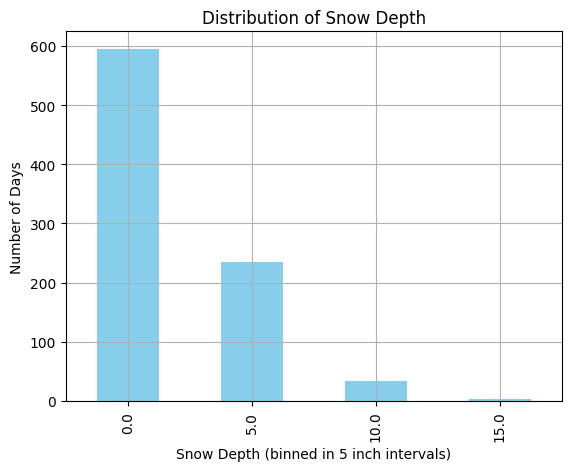

In [ ]:
import matplotlib.pyplot as plt

snow_depth_distribution.plot(
    kind='bar',
    x='snow_depth_bucket',
    y='count',
    legend=False,
    color='skyblue'
)
plt.xlabel('Snow Depth (binned in 5 inch intervals)')
plt.ylabel('Number of Days')
plt.title('Distribution of Snow Depth')
plt.grid(True)
plt.show()


Class Imbalance Check for Target Values

In [54]:
%%bigquery snow_class_distribution
SELECT
  snow,
  COUNT(*) AS count
FROM `bigquery-public-data.samples.gsod`
WHERE year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 725330
  AND snow IS NOT NULL
GROUP BY snow


Query is running:   0%|          |

Downloading:   0%|          |

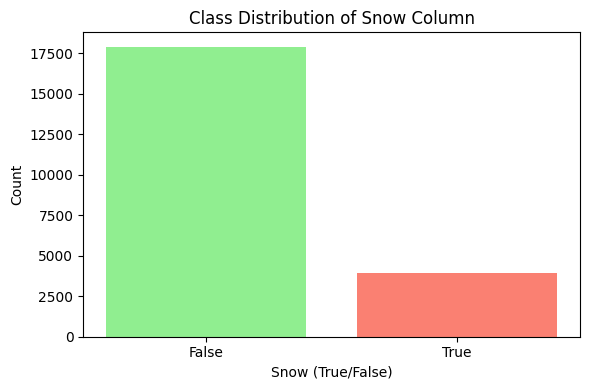

In [55]:
'''Verify the results by plotting them'''

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(snow_class_distribution['snow'].astype(str), snow_class_distribution['count'], color=['lightgreen', 'salmon'])
plt.xlabel('Snow (True/False)')
plt.ylabel('Count')
plt.title('Class Distribution of Snow Column')
plt.tight_layout()
plt.show()


### Data Preprocessing with Pandas and Numpy

Read the data as a Pandas DataFrame

In [66]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('data/coding_challenge.csv', low_memory=False)
df.head()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,...,NaN,NaN,0.01,NaN,False,False,False,False,False,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,...,NaN,NaN,0.00,NaN,True,True,True,True,True,True


### Some information about the data to get an understanding of the values and the data quality, such as the number of existing missing values

In [67]:
# Check for missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


date                                      0
station_number                            0
wban_number                               0
year                                      0
month                                     0
day                                       0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            9
num_mean_dew_point_samples                9
mean_sealevel_pressure                 4156
num_mean_sealevel_pressure_samples     4156
mean_station_pressure                 35530
num_mean_station_pressure_samples     35530
mean_visibility                          19
num_mean_visibility_samples              19
mean_wind_speed                          12
num_mean_wind_speed_samples              12
max_sustained_wind_speed                 17
max_gust_wind_speed                   15022
max_temperature                           3
max_temperature_explicit                  3
min_temperature                 

In [68]:
print("\nDescriptive statistics:")
df.describe(include='all')


Descriptive statistics:


,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
count,37415,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37415.000000,37406.000000,37406.000000,...,0.0,0.0,36967.000000,1371.000000,37415,37415,37415,37415,37415,37415
unique,3757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,2003-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
freq,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32023,32023,32023,32023,32023,32023
mean,NaN,725316.975999,76494.458693,2004.650140,6.404544,15.693305,51.327756,23.477643,41.549799,23.459899,...,NaN,NaN,0.091325,3.298395,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.979533,37759.645955,2.975256,3.477842,8.799459,19.339455,1.931922,18.702883,1.963464,...,NaN,NaN,0.274432,2.594114,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,725300.000000,3887.000000,2000.000000,1.000000,1.000000,-16.200001,4.000000,-23.500000,4.000000,...,NaN,NaN,0.000000,1.200000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,725314.000000,14842.000000,2002.000000,3.000000,8.000000,35.700001,24.000000,27.200001,24.000000,...,NaN,NaN,0.000000,1.200000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,725316.000000,99999.000000,2005.000000,6.000000,16.000000,53.000000,24.000000,42.299999,24.000000,...,NaN,NaN,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,725326.000000,99999.000000,2007.000000,9.000000,23.000000,68.400002,24.000000,57.299999,24.000000,...,NaN,NaN,0.030000,5.100000,NaN,NaN,NaN,NaN,NaN,NaN


# NaN Value Check
It is important to check how many values of a column are missing

For this task I droped all the columns that have more than 70% missing values since we have fairly enough data for training our model

For some cases such as existence of very important columns that we cannot drop or very limited data quantity, we need to do data imputatoin, meaning that we have to choose an optimal way of filling the NaN values, either through mean, bfill, prediction or other methods.

As already mentioned, dropping is only optimal, when a column is not valuable for the predictions

In [69]:
from tabulate import tabulate

# Drop columns with too many missing values
missing_threshold = 0.8
cols_to_drop = df.columns[df.isnull().mean() > missing_threshold]
df = df.drop(columns=cols_to_drop)

# Format and print
if cols_to_drop.any():
    print("\nDropped Columns (more than 80% missing):\n")
    print(tabulate([[col] for col in cols_to_drop], headers=["Column Name"], tablefmt="fancy_grid"))
else:
    print("No columns were dropped (all columns have less than 80% missing values).")



Dropped Columns (more than 80% missing):

╒═══════════════════════════════════╕
│ Column Name                       │
╞═══════════════════════════════════╡
│ mean_station_pressure             │
├───────────────────────────────────┤
│ num_mean_station_pressure_samples │
├───────────────────────────────────┤
│ min_temperature                   │
├───────────────────────────────────┤
│ min_temperature_explicit          │
├───────────────────────────────────┤
│ snow_depth                        │
╘═══════════════════════════════════╛


### For the remaining missing values

For normally distributed data, I used mean and for others I used median

In [ ]:
'''For numerical columns:'''
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        
        # For normally distributed data - mean
        if abs(df[col].skew()) < 1:  # mild skewness
            impute_value = df[col].mean()
        # For skewed data - median
        else:
            impute_value = df[col].median()
            print(f"Using median: {impute_value:.2f}")
        
        df[col] = df[col].fillna(impute_value)

'''For categorical columns:'''
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        
        # Use most frequent value for imputation
        impute_value = df[col].mode()[0]
        
        df[col] = df[col].fillna(impute_value)

Using median: 24.00
Using median: 23.00
Using median: 9.50
Using median: 24.00
Using median: 24.00
Using median: 22.00
Using median: 0.00


/tmp/ipykernel_15552/4237089540.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(impute_value)


In [71]:
'''Verify there are no more missing values'''
print("Number of remaining missing values\n")
df.isnull().sum()

Number of remaining missing values



date                                  0
station_number                        0
wban_number                           0
year                                  0
month                                 0
day                                   0
mean_temp                             0
num_mean_temp_samples                 0
mean_dew_point                        0
num_mean_dew_point_samples            0
mean_sealevel_pressure                0
num_mean_sealevel_pressure_samples    0
mean_visibility                       0
num_mean_visibility_samples           0
mean_wind_speed                       0
num_mean_wind_speed_samples           0
max_sustained_wind_speed              0
max_gust_wind_speed                   0
max_temperature                       0
max_temperature_explicit              0
total_precipitation                   0
fog                                   0
rain                                  0
snow                                  0
hail                                  0


### Checking for duplicates

In [72]:
# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Remove duplicates
# There are no duplicates in the dataset, otherwise we would use the following line
#df.drop_duplicates(inplace=True)

Number of duplicates: 0


### Drop year, month, and day columns since we have date column now to make the data more readable by human eyes

In [73]:
df = df.drop(columns=['year', 'month', 'day'])

### Weather-Bureau-Army-Navy number (wban_number) shows us the location of each station, therefore it is helpful to keep it and we need to implement oneHot Encoding

In [74]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df[['wban_number']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['wban_number']))
df_encoded = pd.concat([df.drop('wban_number', axis=1), encoded_df], axis=1)

df_encoded.head()

,date,station_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,...,wban_number_3960,wban_number_4846,wban_number_4894,wban_number_14827,wban_number_14842,wban_number_53802,wban_number_94846,wban_number_94870,wban_number_94892,wban_number_99999
0,2000-08-11,725327,75.000000,11,60.500000,11.0,1020.500000,11.0,10.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2000-09-17,725316,62.400002,23,47.500000,23.0,1017.250552,23.0,10.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2000-07-11,725316,76.800003,23,73.000000,23.0,1017.250552,23.0,8.4,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2000-08-14,725305,74.099998,23,66.599998,23.0,1016.400024,23.0,8.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2000-01-23,725317,25.299999,23,22.500000,23.0,1017.599976,23.0,3.9,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### station_number is an (ID), therefore it is not useful for training the model

In [75]:
df_encoded.drop(columns=['station_number'], inplace=True)
df_encoded.head()

,date,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,...,wban_number_3960,wban_number_4846,wban_number_4894,wban_number_14827,wban_number_14842,wban_number_53802,wban_number_94846,wban_number_94870,wban_number_94892,wban_number_99999
0,2000-08-11,75.000000,11,60.500000,11.0,1020.500000,11.0,10.0,11.0,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2000-09-17,62.400002,23,47.500000,23.0,1017.250552,23.0,10.0,23.0,8.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2000-07-11,76.800003,23,73.000000,23.0,1017.250552,23.0,8.4,23.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2000-08-14,74.099998,23,66.599998,23.0,1016.400024,23.0,8.0,23.0,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2000-01-23,25.299999,23,22.500000,23.0,1017.599976,23.0,3.9,23.0,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Checking for imbabalance in the target data (Very important step)

The target column is `snow`, therefore we have to check how many True and how many False labels we have

It is important because if we train the model on an imbalanced dataset, the model will have too much of one class and too less from the other class, therefore the predictions will be biased towards the class that has more presence in the dataset

In this dataset, `85.59%` of the `snow` column are False and `14.41%` are True, which shows a huge imbalance

In [ ]:
# Snow counts and percentages
snow_counts = df_encoded['snow'].value_counts()
snow_percent = df_encoded['snow'].value_counts(normalize=True) * 100

print(f"\n{'='*40}")
print(f"{'Snow Counts and Percentages':^40}")
print(f"{'='*40}")

# Print counts
print(f"\n{'Counts':^20}")
print(f"{'='*20}")
print(snow_counts.to_string())

# Print percentages
print(f"\n{'Percentages (%)':^20}")
print(f"{'='*20}")
print(snow_percent.round(2).to_string())

print(f"\n{'='*40}")



      Snow Counts and Percentages       

       Counts       
snow
False    32023
True      5392

  Percentages (%)   
snow
False    85.59
True     14.41



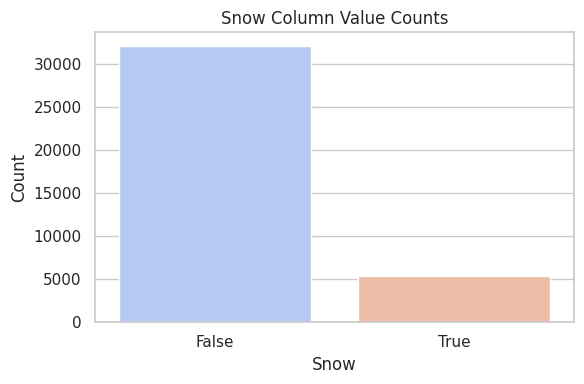

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count True and False values in "snow"
snow_counts = df_encoded['snow'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=snow_counts.index.astype(str), 
            y=snow_counts.values, 
            palette="coolwarm", 
            hue=snow_counts.index.astype(str))

plt.title('Snow Column Value Counts')
plt.xlabel('Snow')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Balance the dataset

Here random rows are chosen and the rest just simply droped to balance the model

The datset is now 50% by 50% balanced, but this number doesn't have to be exactly 50% (a value of 60%-40% will also work pretty well)

In [78]:
# Separate majority and minority classes
df_snow_true = df_encoded[df_encoded['snow'] == True]
df_snow_false = df_encoded[df_encoded['snow'] == False]

# Undersample majority class
df_snow_false_downsampled = df_snow_false.sample(n=len(df_snow_true), random_state=42)

# Combine
df_balanced = pd.concat([df_snow_true, df_snow_false_downsampled]).sample(frac=1, random_state=42)

# Check balance
df_balanced['snow'].value_counts()


snow
False    5392
True     5392
Name: count, dtype: int64

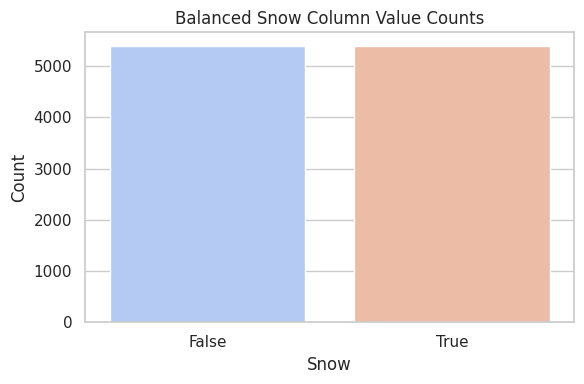

In [ ]:
'''Verify the datset is now balanced'''
snow_counts_bal = df_balanced['snow'].value_counts()

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=snow_counts_bal.index.astype(str), 
            y=snow_counts_bal.values, 
            palette="coolwarm",
            hue=snow_counts_bal.index.astype(str))
plt.title('Balanced Snow Column Value Counts')
plt.xlabel('Snow')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Check for outliers

/tmp/ipykernel_15552/998889546.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{outliers_count['Outliers %'][i]:.2f}%",


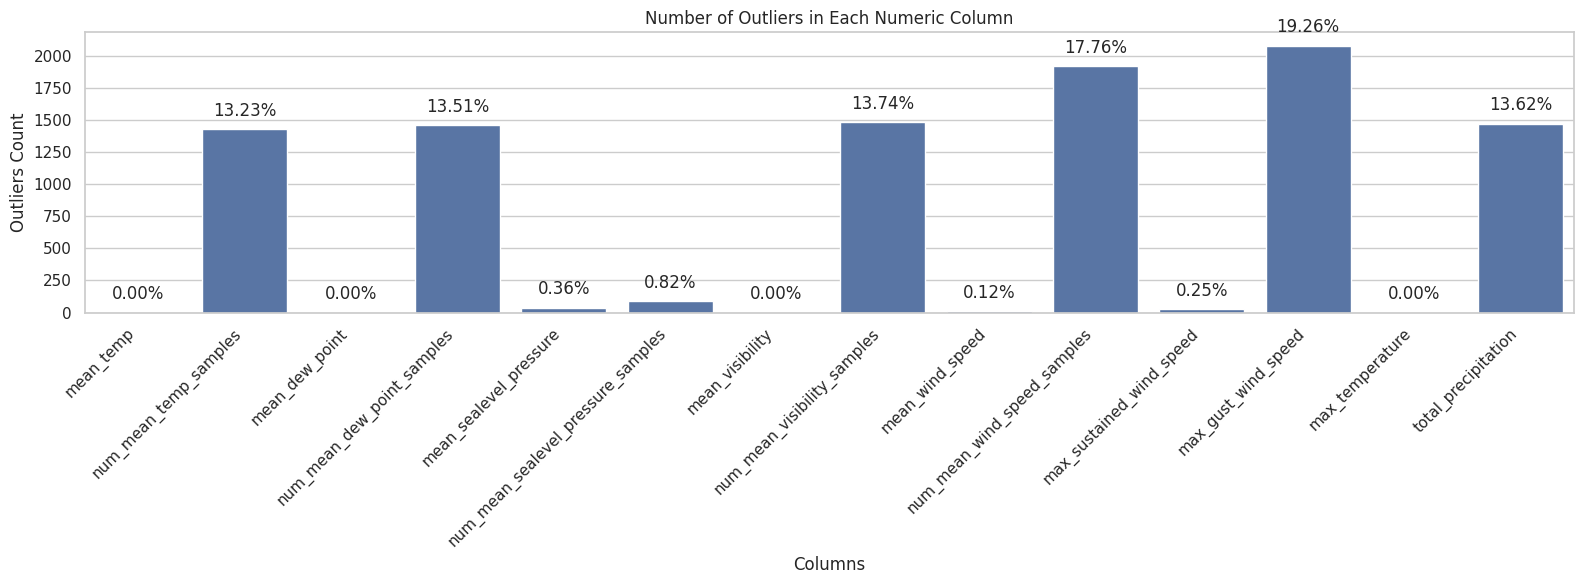

In [ ]:
# numeric columns
numeric_cols = [col for col in df_balanced.select_dtypes(include='number').columns if not col.startswith('wban_')]

# IQR for each numeric column to detect outliers
Q1 = df_balanced[numeric_cols].quantile(0.25)
Q3 = df_balanced[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# IQR multiplier to reduce sensitivity (increase to make it less sensitive)
IQR_multiplier = 2.5 

# DataFrame to store the number of outliers for each column
outliers_count = pd.DataFrame(index=numeric_cols)
_
# Outliers count for each column
outliers_count['Outliers'] = ((df_balanced[numeric_cols] < (Q1 - IQR_multiplier * IQR)) | 
                              (df_balanced[numeric_cols] > (Q3 + IQR_multiplier * IQR))).sum()

# Percentage of outliers
outliers_count['Outliers %'] = (outliers_count['Outliers'] / len(df_balanced)) * 100

# Plot the number of outliers for each column
plt.figure(figsize=(16, 6))
sns.barplot(x=outliers_count.index, 
            y=outliers_count['Outliers'])

for i, v in enumerate(outliers_count['Outliers']):
    plt.text(i, v + 0.05 * max(outliers_count['Outliers']), 
             f"{outliers_count['Outliers %'][i]:.2f}%", 
             ha="center")

plt.title("Number of Outliers in Each Numeric Column")
plt.xlabel("Columns")
plt.ylabel("Outliers Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Some columns show a high number of outliers, like `num_mean_wind_speed_samples` and `max_gust_wind_speed`. This means we need to check the data distribution first, before implementing any outlier removal, specifically to identify if the data is heavy-tailed or skewed.

### Heavy-Tailed Distributions
These have more outliers than normal distributions and are characterized by high kurtosis (>3).

### Skewed Distributions
These are asymmetrical, with values concentrated on one side.


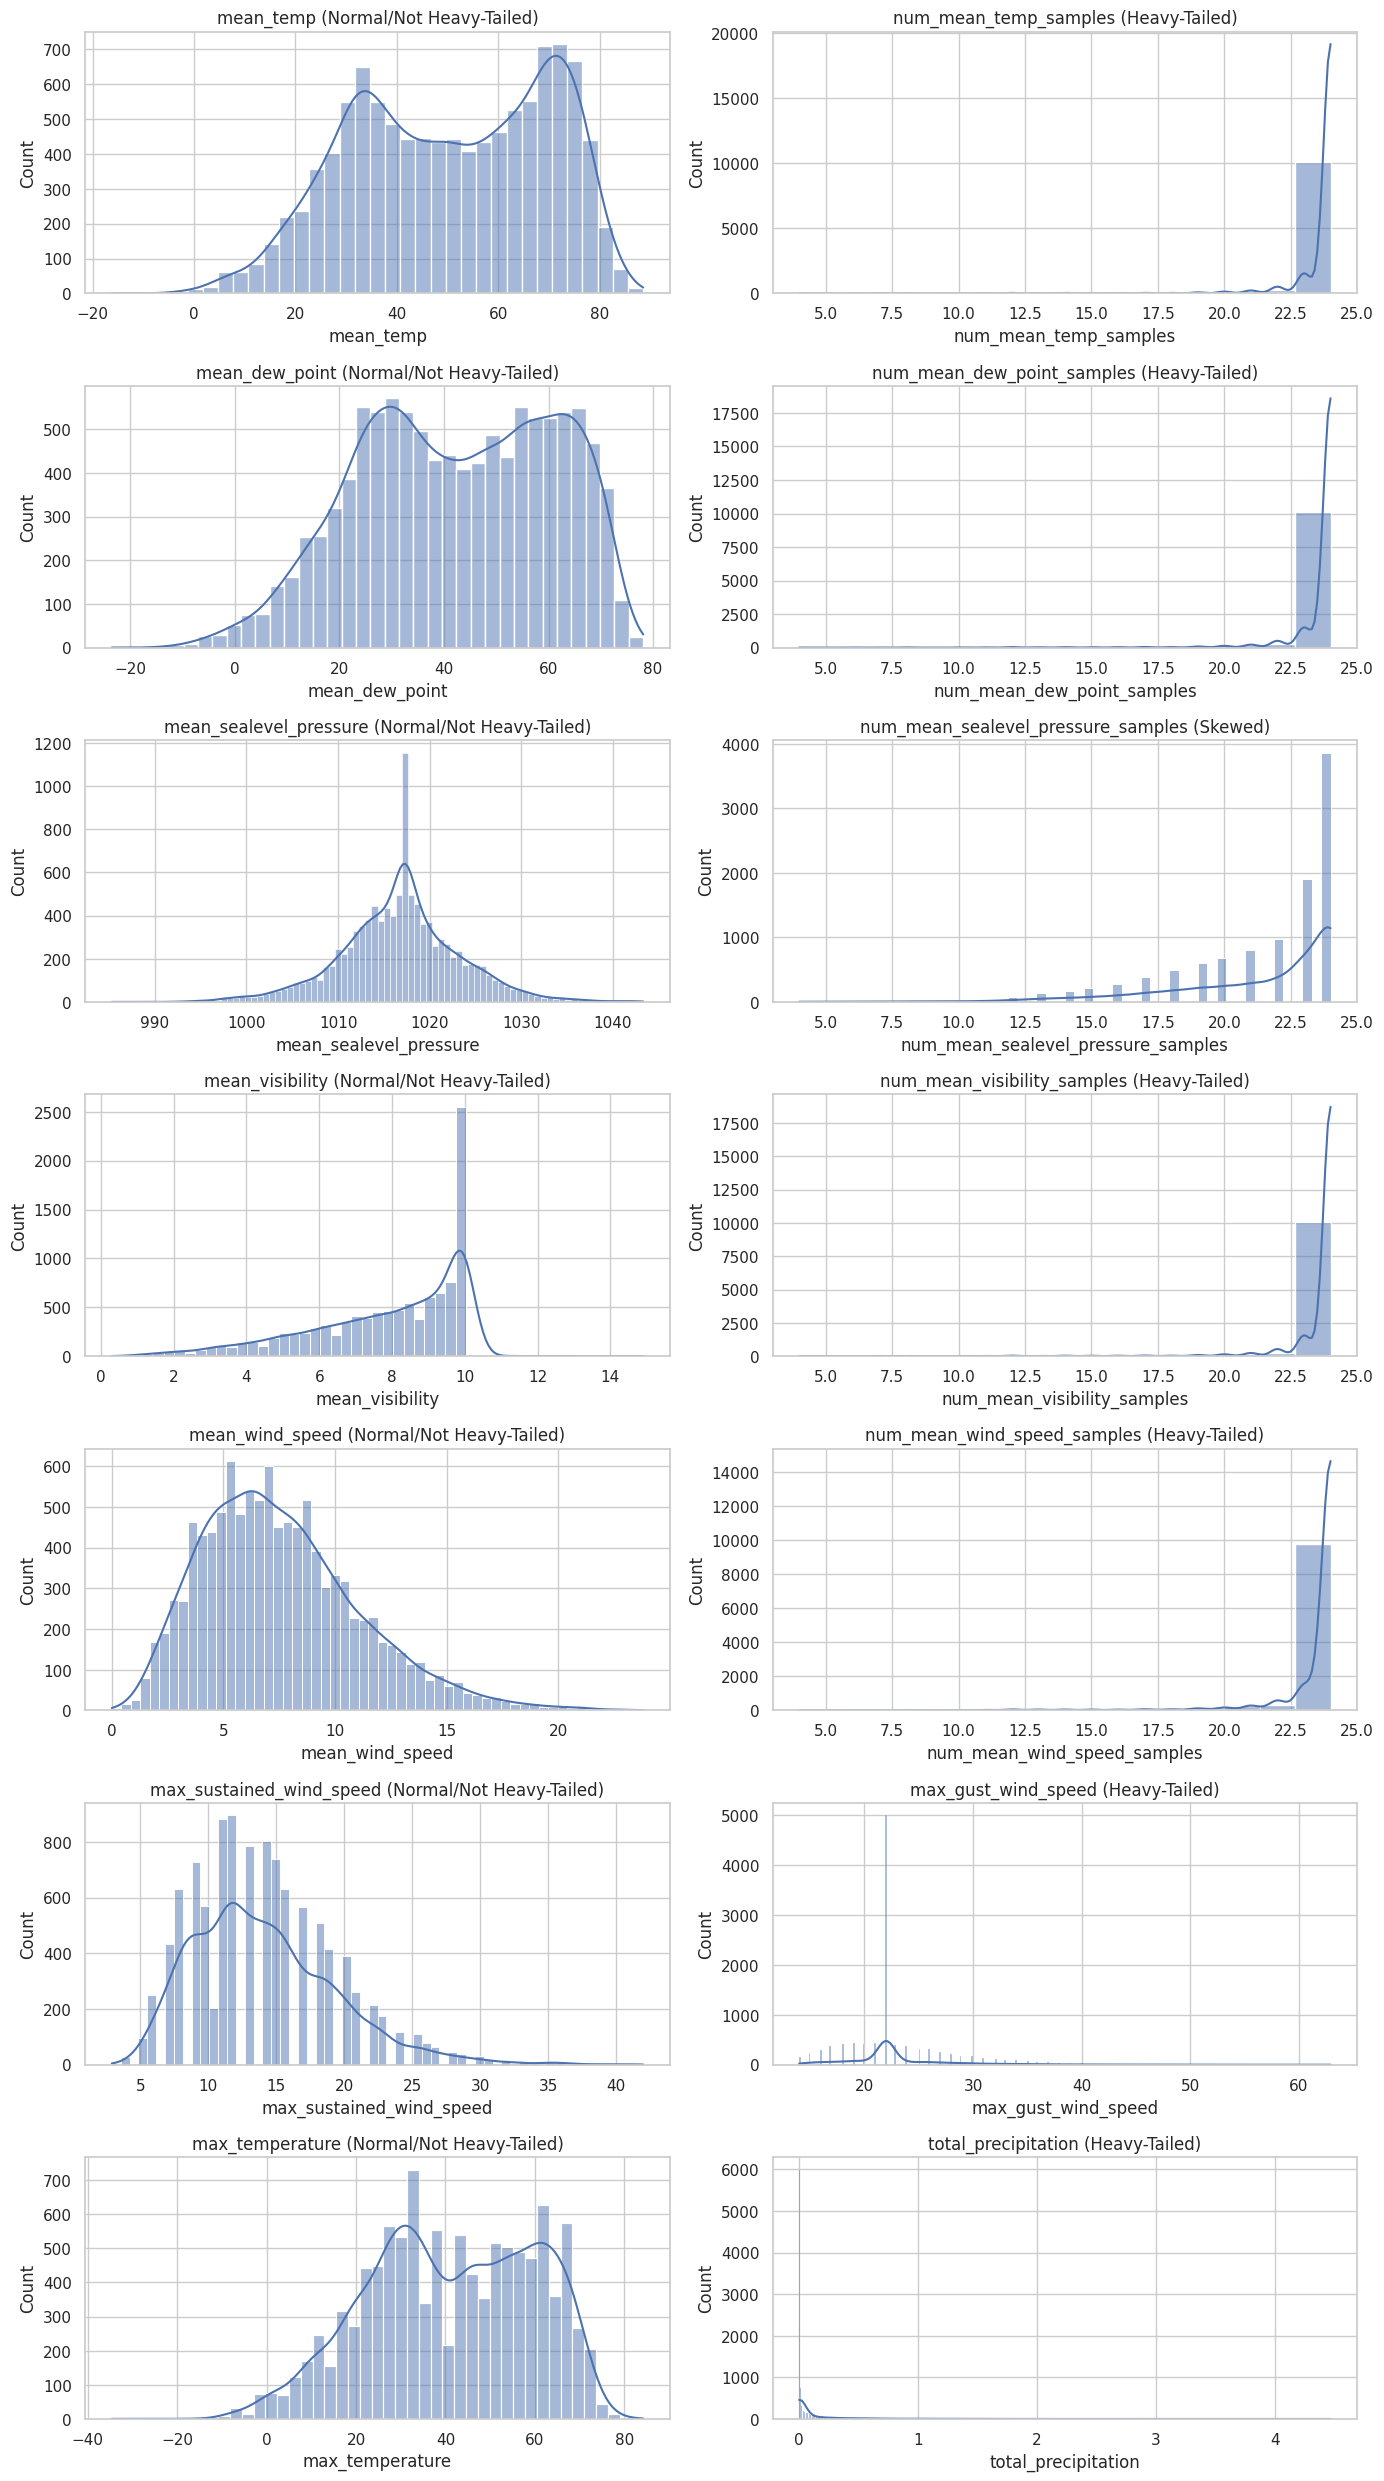

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# numeric columns
numeric_cols = [col for col in df_balanced.select_dtypes(include='number').columns if not col.startswith('wban_')]

# Calculate kurtosis and skewness for each numeric column
kurtosis_values = df_balanced[numeric_cols].apply(stats.kurtosis)
skewness_values = df_balanced[numeric_cols].skew()

# Identify heavy-tailed columns (kurtosis > 3)
heavy_tailed_cols = kurtosis_values[kurtosis_values > 3].index.tolist()

# Identify skewed columns (skewness > 1 or < -1)
skewed_cols = skewness_values[abs(skewness_values) > 1].index.tolist()

# Plot
plt.figure(figsize=(14, len(numeric_cols) * 2))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i + 1)
    sns.histplot(df_balanced[col], kde=True)
    
    if col in heavy_tailed_cols:
        plt.title(f"{col} (Heavy-Tailed)")
    elif col in skewed_cols:
        plt.title(f"{col} (Skewed)")
    else:
        plt.title(f"{col} (Normal/Not Heavy-Tailed)")
    plt.tight_layout()

plt.show()


Normally, we need to first implement some methods, like Winsorize, QuantileTransformation, and Box-Cox, which are implemented below, but as already visible, the application cannot always make much difference.

Therefore, to make the distribution more fair between different numbers, we can implement downsampling on the numbers, whic appear the most in the dataset

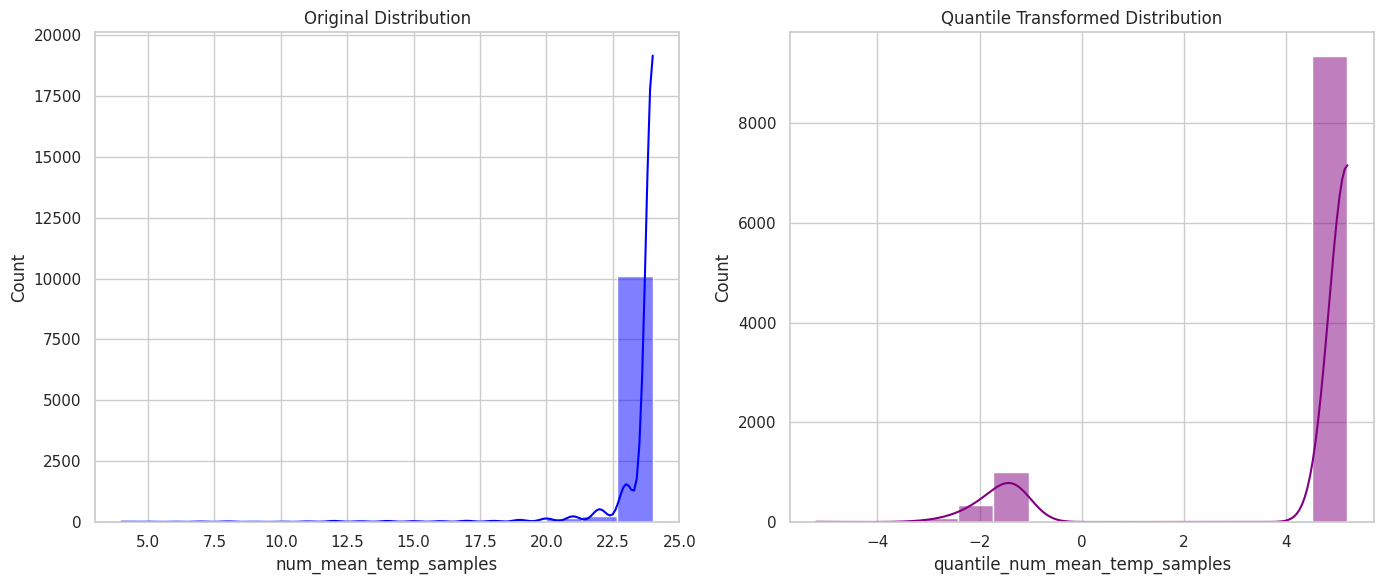

In [ ]:
from sklearn.preprocessing import QuantileTransformer

col = 'num_mean_temp_samples'
qt = QuantileTransformer(output_distribution='normal')
test_df = df_balanced.copy()
test_df['quantile_num_mean_temp_samples'] = qt.fit_transform(df_balanced[[col]])

# Plot the comparison
plt.figure(figsize=(14, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(df_balanced[col], kde=True, color='blue')
plt.title('Original Distribution')

# Quantile transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(test_df['quantile_num_mean_temp_samples'], kde=True, color='purple')
plt.title('Quantile Transformed Distribution')

plt.tight_layout()
plt.show()


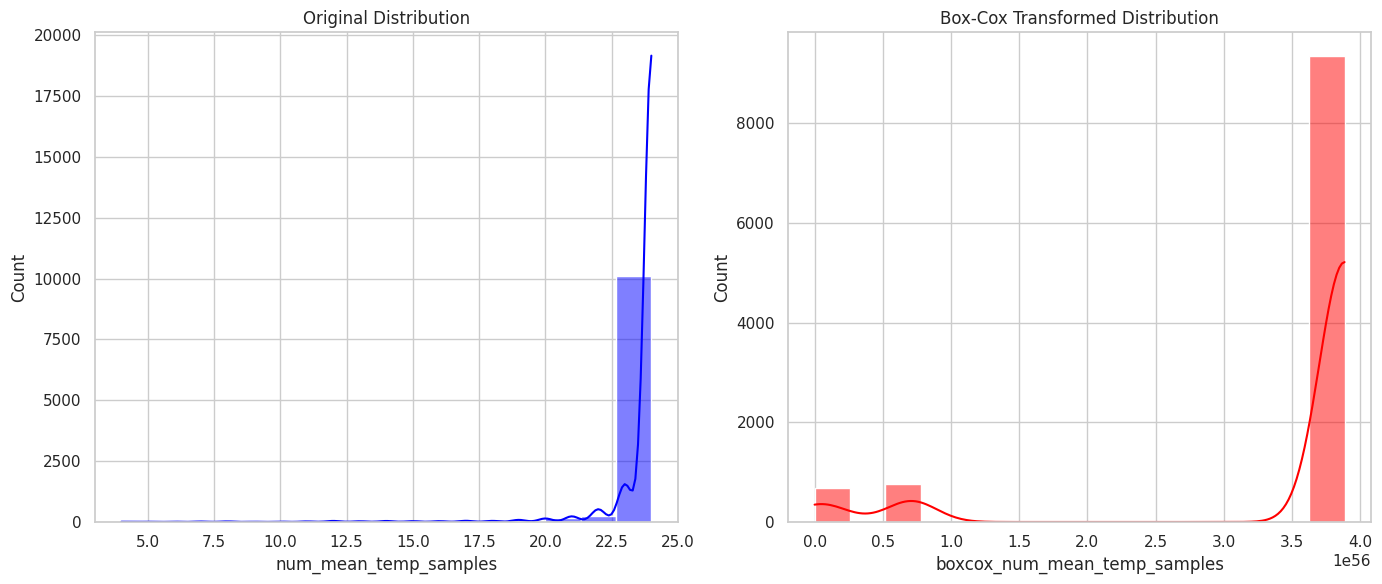

In [ ]:
from scipy import stats

# Apply Box-Cox transformation
test_df = df_balanced.copy()
test_df['boxcox_num_mean_temp_samples'], _ = stats.boxcox(df_balanced['num_mean_temp_samples'] + 1)  # Adding 1 to avoid zero values

# Plot the comparison
plt.figure(figsize=(14, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(df_balanced['num_mean_temp_samples'], kde=True, color='blue')
plt.title('Original Distribution')

# Box-Cox transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(test_df['boxcox_num_mean_temp_samples'], kde=True, color='red')
plt.title('Box-Cox Transformed Distribution')

plt.tight_layout()
plt.show()


### Data Downsampling Implementation

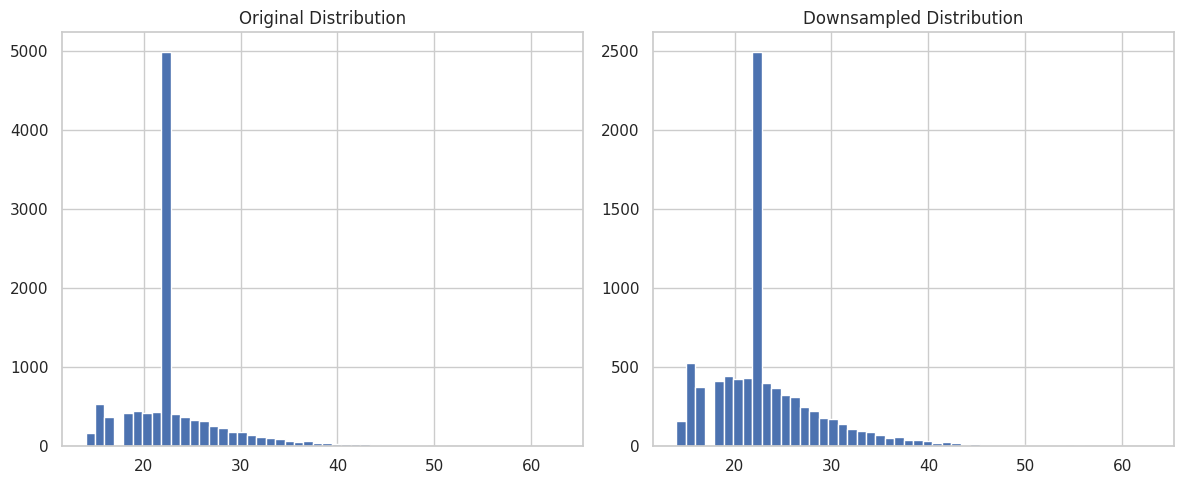

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

col = 'max_gust_wind_speed'
# Count frequencies
value_counts = df_balanced[col].value_counts()
most_common_val = value_counts.idxmax()

# Downsample the most frequent value (keep only 50% of them)
mask = df_balanced[col] != most_common_val
common_samples = df_balanced[df_balanced[col] == most_common_val].sample(frac=0.50, random_state=42)
test_df = df_balanced.copy()
test_df = pd.concat([df_balanced[mask], common_samples])

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_balanced[col].hist(bins=50)
plt.title("Original Distribution")

plt.subplot(1, 2, 2)
test_df[col].hist(bins=50)
plt.title("Downsampled Distribution")

plt.tight_layout()
plt.show()


The above downsampling implementation shows how good downsampling has worked

Now we can go ahead and apply this to `max_gust_wind_speed`, `num_mean_temp_samples`, `num_mean_dew_point_samples`, `mean_sealevel_pressure`, `num_mean_sealevel_pressure_samples`, `mean_visibility`, `num_mean_visibility_samples`, and `num_mean_wind_speed_samples`

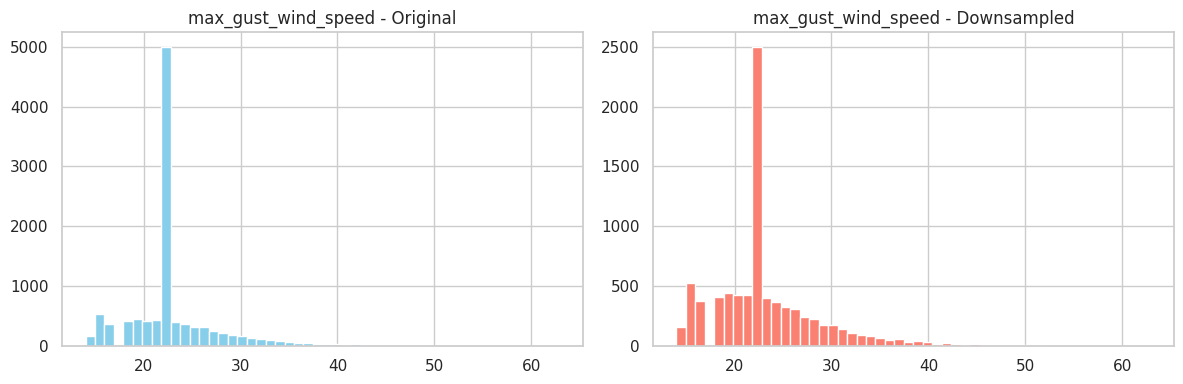

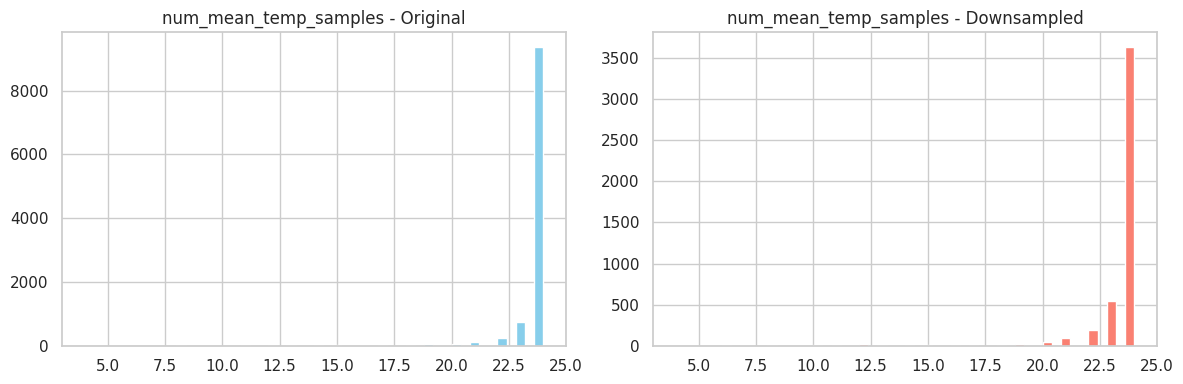

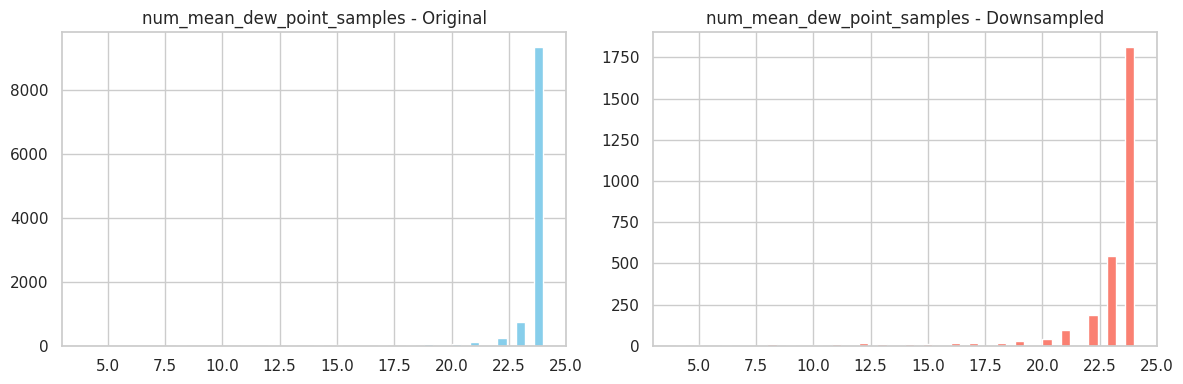

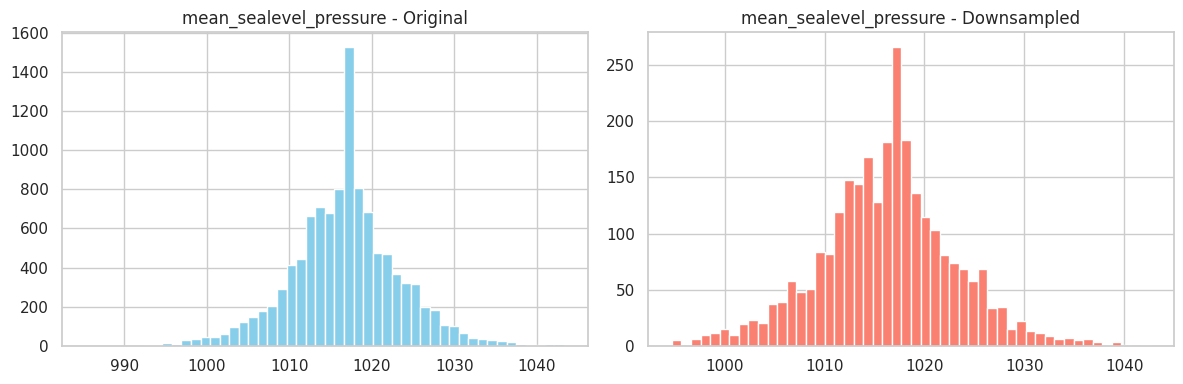

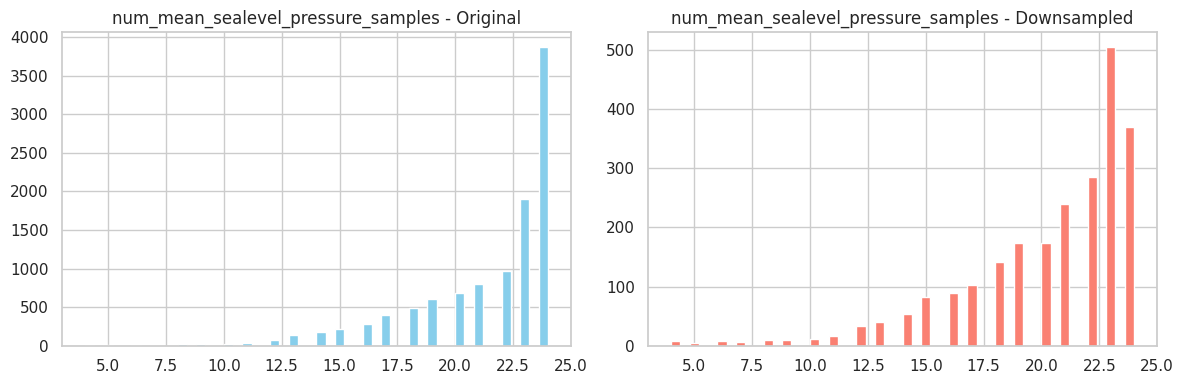

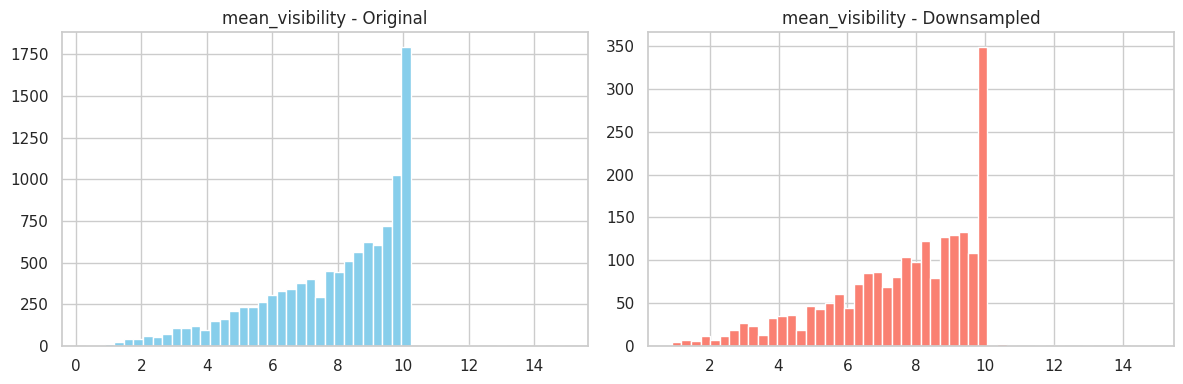

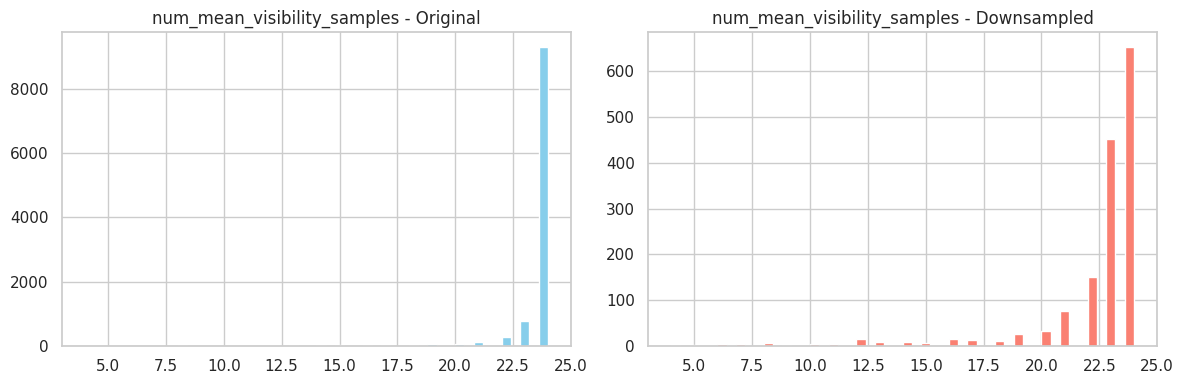

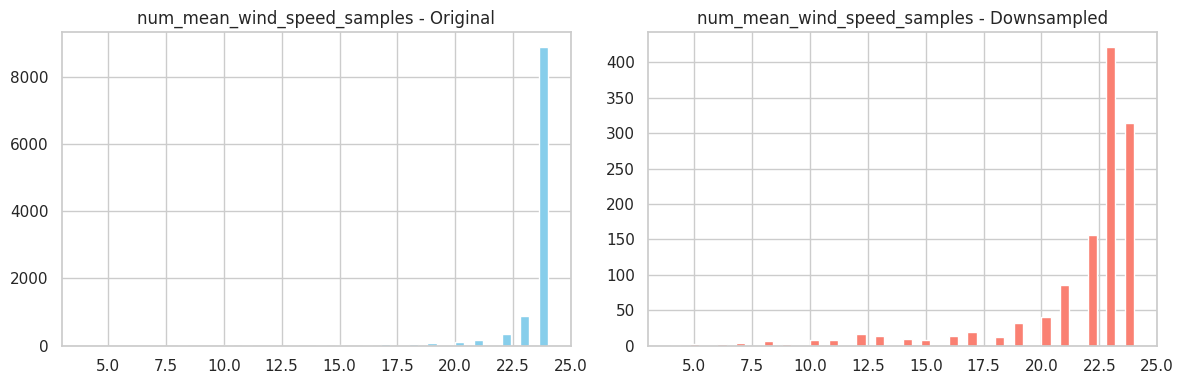

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

columns = [
    'max_gust_wind_speed',
    'num_mean_temp_samples',
    'num_mean_dew_point_samples',
    'mean_sealevel_pressure',
    'num_mean_sealevel_pressure_samples',
    'mean_visibility',
    'num_mean_visibility_samples',
    'num_mean_wind_speed_samples'
]

df_downsampled = df_balanced.copy()

for col in columns:
    value_counts = df_downsampled[col].value_counts()
    most_common_val = value_counts.idxmax()
    
    # Downsample most frequent value
    mask = df_downsampled[col] != most_common_val
    common_samples = df_downsampled[df_downsampled[col] == most_common_val].sample(frac=0.5, random_state=42)
    df_downsampled = pd.concat([df_downsampled[mask], common_samples])

    # Plot
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    df_balanced[col].hist(bins=50, color='skyblue')
    plt.title(f"{col} - Original")

    plt.subplot(1, 2, 2)
    df_downsampled[col].hist(bins=50, color='salmon')
    plt.title(f"{col} - Downsampled")

    plt.tight_layout()
    plt.show()


### Scaling the data

Scaling is needed to make features comparable in magnitude, so no single feature dominates the learning process. It helps many models (like SVM or logistic regression) converge faster and perform better.


In [101]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns excluding oneHot encoded columns
numeric_cols = [col for col in df_downsampled.select_dtypes(include='number').columns if not col.startswith('wban_')]

# Scale the data
scaler = StandardScaler()
downsampled_df_scaled = df_downsampled.copy()
downsampled_df_scaled[numeric_cols] = scaler.fit_transform(df_downsampled[numeric_cols])
downsampled_df_scaled.head()


,date,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,...,wban_number_3960,wban_number_4846,wban_number_4894,wban_number_14827,wban_number_14842,wban_number_53802,wban_number_94846,wban_number_94870,wban_number_94892,wban_number_99999
27627,2000-06-17,0.530360,0.304695,0.499935,0.318643,0.225407,0.879731,0.996862,0.312148,-0.416193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15906,2007-02-25,-0.853203,0.304695,-0.575594,0.318643,-2.679156,-2.573036,-1.933779,0.312148,1.539626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28695,2003-03-15,-0.007101,-2.019557,0.022532,-1.964178,-0.015383,-1.093278,-1.142971,-1.983993,-0.443357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3043,2002-05-13,0.216397,0.304695,0.324338,0.318643,0.345801,-1.093278,0.113018,0.312148,1.295148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20048,2004-01-14,-0.943667,-0.027341,-0.926787,-0.007475,0.330755,0.386479,0.950344,-0.015872,0.534552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Transform columns with boolean values to integers

In [102]:
# Identify boolean columns
bool_cols = downsampled_df_scaled.select_dtypes(include='bool').columns

# Convert to integers (0 and 1)
downsampled_df_scaled[bool_cols] = downsampled_df_scaled[bool_cols].astype(int)

downsampled_df_scaled.head()


,date,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,...,wban_number_3960,wban_number_4846,wban_number_4894,wban_number_14827,wban_number_14842,wban_number_53802,wban_number_94846,wban_number_94870,wban_number_94892,wban_number_99999
27627,2000-06-17,0.530360,0.304695,0.499935,0.318643,0.225407,0.879731,0.996862,0.312148,-0.416193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15906,2007-02-25,-0.853203,0.304695,-0.575594,0.318643,-2.679156,-2.573036,-1.933779,0.312148,1.539626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28695,2003-03-15,-0.007101,-2.019557,0.022532,-1.964178,-0.015383,-1.093278,-1.142971,-1.983993,-0.443357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3043,2002-05-13,0.216397,0.304695,0.324338,0.318643,0.345801,-1.093278,0.113018,0.312148,1.295148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20048,2004-01-14,-0.943667,-0.027341,-0.926787,-0.007475,0.330755,0.386479,0.950344,-0.015872,0.534552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Save the preprocessed datat to a new CSV file

In [103]:
# Save the downsampled DataFrame to a new CSV file
downsampled_df_scaled.to_csv('./data/preprocessed_dataset.csv', index=False)
downsampled_df_scaled.head()

,date,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,...,wban_number_3960,wban_number_4846,wban_number_4894,wban_number_14827,wban_number_14842,wban_number_53802,wban_number_94846,wban_number_94870,wban_number_94892,wban_number_99999
27627,2000-06-17,0.530360,0.304695,0.499935,0.318643,0.225407,0.879731,0.996862,0.312148,-0.416193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15906,2007-02-25,-0.853203,0.304695,-0.575594,0.318643,-2.679156,-2.573036,-1.933779,0.312148,1.539626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28695,2003-03-15,-0.007101,-2.019557,0.022532,-1.964178,-0.015383,-1.093278,-1.142971,-1.983993,-0.443357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3043,2002-05-13,0.216397,0.304695,0.324338,0.318643,0.345801,-1.093278,0.113018,0.312148,1.295148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20048,2004-01-14,-0.943667,-0.027341,-0.926787,-0.007475,0.330755,0.386479,0.950344,-0.015872,0.534552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [104]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]


'2005-05-18'

### Create Train, Test and Eval set - Considering that the days we are going to predict falls in test set

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/preprocessed_dataset.csv')

date_column = 'date'

# Convert date column to datetime
df[date_column] = pd.to_datetime(df[date_column])

# Define the cutoff date for test set (20 years ago from today)
test_cutoff_date = dt.datetime(year=2005, month=5, day=13) # dt.datetime.today() - dt.timedelta(days=20*365) Commented out since it provides inaccurate date
print(f"Test set will contain data after: {test_cutoff_date.date()}")

# Split into test and non-test data
test_mask = df[date_column] > test_cutoff_date
test_df = df[test_mask].copy()
non_test_df = df[~test_mask].copy()

# Split off evaluation set 
train_df, eval_df = train_test_split(
    non_test_df,
    test_size=0.1, 
    random_state=42,  # For reproducibility
    shuffle=True    
)
print(f"\n{'='*40}")
print(f"{'Data Split Summary':^40}")
print(f"{'='*40}")
print(f"Total samples: {len(df):,}")
print(f"Test set size: {len(test_df):,} ({len(test_df)/len(df):.1%})")
print(f"Training set size: {len(non_test_df) - len(eval_df):,} ({(len(non_test_df) - len(eval_df))/len(df):.1%})")
print(f"Evaluation set size: {len(eval_df):,} ({len(eval_df)/len(df):.1%})")
print(f"{'='*40}")

# Verify no date overlap between sets
print(f"\n{'='*40}")
print(f"{'Date Range for Each Split':^40}")
print(f"{'='*40}")
print(f"Training: {train_df[date_column].min().date()} to {train_df[date_column].max().date()}")
print(f"Evaluation: {eval_df[date_column].min().date()} to {eval_df[date_column].max().date()}")
print(f"Test: {test_df[date_column].min().date()} to {test_df[date_column].max().date()}")
print(f"{'='*40}")


Test set will contain data after: 2005-05-13

           Data Split Summary           
Total samples: 1,178
Test set size: 532 (45.2%)
Training set size: 581 (49.3%)
Evaluation set size: 65 (5.5%)

       Date Range for Each Split        
Training: 2000-01-03 to 2005-05-12
Evaluation: 2000-01-04 to 2005-04-25
Test: 2005-05-14 to 2010-04-05


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [106]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

'2005-05-18'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

 ## The submission of this assignment is on Tuesday 2025-5-13, therefore we are going to predict the snow forecast for 2005-5-14 (20 years ago, tomorrow)

 First, we start by checking if the date 2005-05-14 is in our `test_df`

In [107]:
# Filter the dataframe to only include rows with 2005-05-14
filtered_df = test_df[test_df['date'] == '2005-05-14']
filtered_df

,date,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,...,wban_number_3960,wban_number_4846,wban_number_4894,wban_number_14827,wban_number_14842,wban_number_53802,wban_number_94846,wban_number_94870,wban_number_94892,wban_number_99999
1031,2005-05-14,0.535681,0.636731,0.812716,0.64476,-0.90331,-0.3534,-1.282526,0.640168,0.344403,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training the model using XGboost

In [108]:
import xgboost as xgb

# Drop columns not needed for training
drop_cols = [
    'date', 'snow',  # target and date
    'rain', 'fog', 'hail', 'thunder', 'tornado'  # potential leakage columns
]

X_train = train_df.drop(columns=drop_cols)
y_train = train_df['snow']

# Train the XGBoost classifier
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Get the filtered dataframe to predict for multiple rows
X_filtered = filtered_df.drop(columns=drop_cols)

# Predict on the filtered dataframe (multiple rows)
y_pred_filtered = model.predict(X_filtered)

# Get the actual values from filtered_df
y_actual_filtered = filtered_df['snow'].values

In [ ]:
'''Print out the results'''
from tabulate import tabulate

table_data = []
for idx, (pred, actual) in enumerate(zip(y_pred_filtered, y_actual_filtered)):
    date_label = f"Row {idx + 1} - 2005-05-14"
    predicted = "It will snow [1]" if pred == 1 else "It won't snow [0]"
    actual_val = "It snowed [1]" if actual == 1 else "It didn't snow [0]"
    table_data.append([date_label, predicted, actual_val])

headers = ["Forecast Date", "Predicted", "Actual"]
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒════════════════════╤══════════════════╤═══════════════╕
│ Forecast Date      │ Predicted        │ Actual        │
╞════════════════════╪══════════════════╪═══════════════╡
│ Row 1 - 2005-05-14 │ It will snow [1] │ It snowed [1] │
╘════════════════════╧══════════════════╧═══════════════╛


## Predict the for all the test- and eval sets

For a better evaluation of our model and to make sure that our prediction wasn't random, we can test the model on the entire test-set and check out some metrics, like `Accuracy` and `Confusin Matrix`

In [110]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Drop columns not needed for training
drop_cols = [
    'date', 'snow',  # target and date
    'rain', 'fog', 'hail', 'thunder', 'tornado'  # potential leakage columns
]

X_train = train_df.drop(columns=drop_cols)
y_train = train_df['snow']

X_eval = eval_df.drop(columns=drop_cols)
y_eval = eval_df['snow']

X_test = test_df.drop(columns=drop_cols)
y_test = test_df['snow']

# Train the XGBoost classifier
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [ ]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score, classification_report

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nOptimized Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
headers = ["Metric", "Precision", "Recall", "F1-Score", "Support"]
table_data = []

for label, metrics in report.items():
    if label not in ['accuracy']:
        table_data.append([
            label,
            f"{metrics['precision']:.2f}",
            f"{metrics['recall']:.2f}",
            f"{metrics['f1-score']:.2f}",
            int(metrics['support'])
        ])

print(tabulate(table_data, headers=headers, tablefmt="pretty"))



Optimized Accuracy: 0.76

Classification Report:
+--------------+-----------+--------+----------+---------+
|    Metric    | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |   0.78    |  0.82  |   0.80   |   305   |
|      1       |   0.73    |  0.68  |   0.71   |   227   |
|  macro avg   |   0.76    |  0.75  |   0.75   |   532   |
| weighted avg |   0.76    |  0.76  |   0.76   |   532   |
+--------------+-----------+--------+----------+---------+


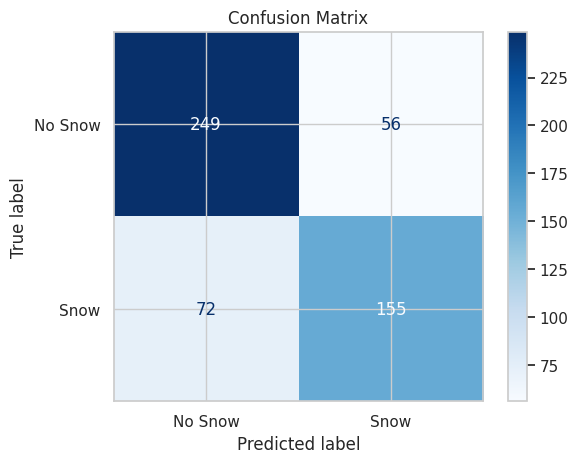

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Snow', 'Snow'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In order to check, if we can further improve the model performance, we can use `GridSearchCV` to find a better combination of hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb

# Define the parameter grid (We can add more parameters, but it will take longer to run)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 9, 12],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0.1, 0.2, 0.3],
    'min_child_weight': [1, 5, 7]
}

# Initialize XGBoost model
model = xgb.XGBClassifier(
    eval_metric='logloss',  # binary classification
    random_state=42,
    early_stopping_rounds=10  # early stopping
)

# StratifiedKFold for classification to ensure class balance in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit with validation set for early stopping
grid_search.fit(
    X_train, y_train,
    eval_set=[(X_eval, y_eval)],  
    verbose=False
)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_ra

In [114]:
# Print Best Hyperparameters with aligned formatting
print("Best Hyperparameters:\n")
print(f"{'colsample_bytree':<20}: {best_params['colsample_bytree']}")
print(f"{'gamma':<20}: {best_params['gamma']}")
print(f"{'learning_rate':<20}: {best_params['learning_rate']}")
print(f"{'max_depth':<20}: {best_params['max_depth']}")
print(f"{'min_child_weight':<20}: {best_params['min_child_weight']}")
print(f"{'n_estimators':<20}: {best_params['n_estimators']}")
print(f"{'subsample':<20}: {best_params['subsample']}")


Best Hyperparameters:

colsample_bytree    : 0.8
gamma               : 0.3
learning_rate       : 0.05
max_depth           : 3
min_child_weight    : 1
n_estimators        : 100
subsample           : 0.8


Here due to limited computation power, not too many hyperparameters were tested, therefore the accuracy of the model after `GridSearchCV` doesn't improve. Alternatively, we can also use `RandomSearchCV`, if limited resources are available

In [ ]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score, classification_report

# Evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nOptimized Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
headers = ["Metric", "Precision", "Recall", "F1-Score", "Support"]
table_data = []

for label, metrics in report.items():
    if label not in ['accuracy']: 
        table_data.append([
            label,
            f"{metrics['precision']:.2f}",
            f"{metrics['recall']:.2f}",
            f"{metrics['f1-score']:.2f}",
            int(metrics['support'])
        ])

print(tabulate(table_data, headers=headers, tablefmt="pretty"))



Optimized Accuracy: 0.74

Classification Report:
+--------------+-----------+--------+----------+---------+
|    Metric    | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |   0.76    |  0.79  |   0.77   |   305   |
|      1       |   0.70    |  0.67  |   0.68   |   227   |
|  macro avg   |   0.73    |  0.73  |   0.73   |   532   |
| weighted avg |   0.74    |  0.74  |   0.74   |   532   |
+--------------+-----------+--------+----------+---------+


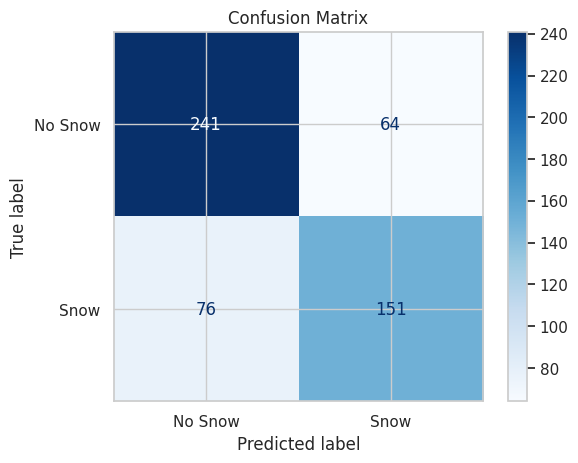

In [116]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Snow', 'Snow'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Random Forest Classifier for benchmarking

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Drop columns not needed for training
drop_cols = [
    'date', 'snow',  # target and date
    'rain', 'fog', 'hail', 'thunder', 'tornado'  # potential leakage columns
]

# Prepare training, evaluation, and test sets
X_train = train_df.drop(columns=drop_cols)
y_train = train_df['snow']

X_test = test_df.drop(columns=drop_cols)
y_test = test_df['snow']

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score, classification_report

# Evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nOptimized Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
headers = ["Metric", "Precision", "Recall", "F1-Score", "Support"]
table_data = []

for label, metrics in report.items():
    if label not in ['accuracy']: 
        table_data.append([
            label,
            f"{metrics['precision']:.2f}",
            f"{metrics['recall']:.2f}",
            f"{metrics['f1-score']:.2f}",
            int(metrics['support'])
        ])

print(tabulate(table_data, headers=headers, tablefmt="pretty"))



Optimized Accuracy: 0.75

Classification Report:
+--------------+-----------+--------+----------+---------+
|    Metric    | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |   0.76    |  0.82  |   0.79   |   305   |
|      1       |   0.73    |  0.65  |   0.69   |   227   |
|  macro avg   |   0.74    |  0.74  |   0.74   |   532   |
| weighted avg |   0.75    |  0.75  |   0.75   |   532   |
+--------------+-----------+--------+----------+---------+


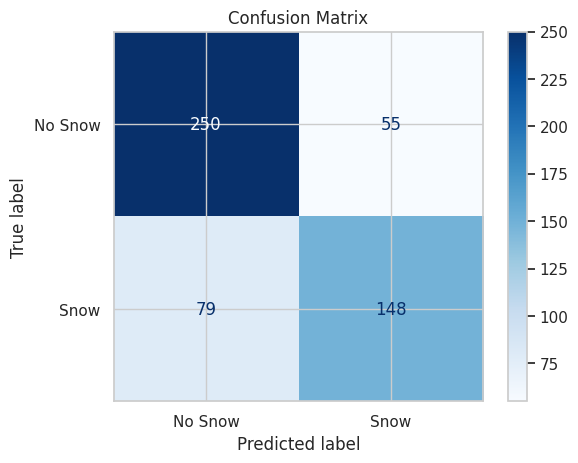

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Snow', 'Snow'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()